In [1]:


from google.colab import files
files.upload()


Saving final_cleaned_data.csv to final_cleaned_data.csv


{'final_cleaned_data.csv': b'age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,slope,num_major_vessels,thalassemia,target\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\n44,1,1,120,263,0,1,173,0,0.0,2,0,3,1\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\n58,0,3,150,283,1,0,162,0,1.0,2,0,2,1\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\n58,0,2,120,340,0,1,172,0,0.0,2,0,2,1\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\n59,1,0,135,234,0,1,161,

   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_induced_angina  \
0                    1            0             150                        0   
1                    0            1             187                        0   
2                    0            0             172                        0   
3                    0            1             178                        0   
4                    0            1             163                        1   

   st_depression  slope  num_major_vessels  thalassemia  target  
0            2.3      0               

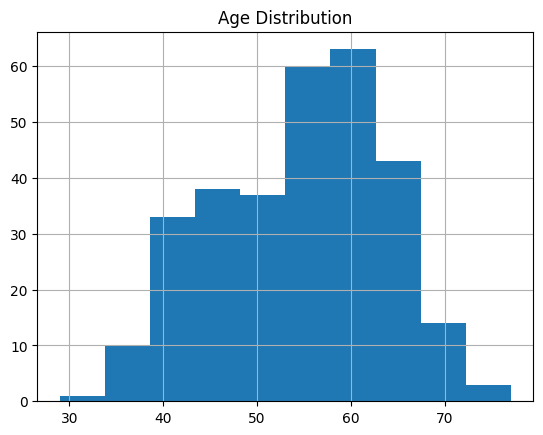

Initial Accuracy: 0.8688524590163934
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Improved Accuracy: 0.8688524590163934


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df = pd.read_csv("final_cleaned_data.csv")

print(df.head())
print(df.info())

print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

df = df.drop_duplicates()
df = df.dropna()

print(df.groupby("age").mean())

df["age"].hist()
plt.title("Age Distribution")
plt.show()

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Initial Accuracy:", accuracy_score(y_test, y_pred))

param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Improved Accuracy:", accuracy_score(y_test, y_pred_best))